In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data=pd.read_csv(r"../dataset/25.csv")

In [3]:
data

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66
...,...,...,...,...,...,...,...
91,2018-01-05,133,100,4,2,0,64
92,2018-01-06,153,300,0,8,0,64
93,2018-01-07,500,200,0,5,500,64
94,2018-01-08,2127,200,0,5,0,64


In [14]:
data.values

array([['2017-10-06', 5464, 200, 181, 5, 0, 66],
       ['2017-10-07', 6041, 100, 197, 8, 0, 66],
       ['2017-10-08', 25, 100, 0, 5, 0, 66],
       ['2017-10-09', 5461, 100, 174, 4, 0, 66],
       ['2017-10-10', 6915, 200, 223, 5, 500, 66],
       ['2017-10-11', 4545, 100, 149, 6, 0, 66],
       ['2017-10-12', 4340, 100, 140, 6, 0, 66],
       ['2017-10-13', 1230, 100, 38, 7, 0, 66],
       ['2017-10-14', 61, 100, 1, 5, 0, 66],
       ['2017-10-15', 1258, 100, 40, 6, 0, 65],
       ['2017-10-16', 3148, 100, 101, 8, 0, 65],
       ['2017-10-17', 4687, 100, 152, 5, 0, 65],
       ['2017-10-18', 4732, 300, 150, 6, 500, 65],
       ['2017-10-19', 3519, 100, 113, 7, 0, 65],
       ['2017-10-20', 1580, 100, 49, 5, 0, 65],
       ['2017-10-21', 2822, 100, 86, 6, 0, 65],
       ['2017-10-22', 181, 100, 6, 8, 0, 65],
       ['2017-10-23', 3158, 200, 99, 5, 0, 65],
       ['2017-10-24', 4383, 200, 143, 4, 0, 64],
       ['2017-10-25', 3881, 200, 125, 5, 0, 64],
       ['2017-10-26', 4037, 200,

In [39]:
data.head()

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66


In [40]:
data.tail()

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
91,2018-01-05,133,100,4,2,0,64
92,2018-01-06,153,300,0,8,0,64
93,2018-01-07,500,200,0,5,500,64
94,2018-01-08,2127,200,0,5,0,64
95,2018-01-09,2203,300,0,5,500,64


In [41]:
data.head(8)

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66
5,2017-10-11,4545,100,149,6,0,66
6,2017-10-12,4340,100,140,6,0,66
7,2017-10-13,1230,100,38,7,0,66


In [42]:
data.columns

Index(['date', 'step_count', 'mood', 'calories_burned', 'hours_of_sleep',
       'bool_of_active', 'weight_kg'],
      dtype='object')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             96 non-null     object
 1   step_count       96 non-null     int64 
 2   mood             96 non-null     int64 
 3   calories_burned  96 non-null     int64 
 4   hours_of_sleep   96 non-null     int64 
 5   bool_of_active   96 non-null     int64 
 6   weight_kg        96 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.4+ KB


In [44]:
data.describe()

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
count,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000
mean,2935.937500,211.458333,93.447917,5.21875,218.750000,64.281250
std,2143.384573,84.442184,71.601951,1.51625,249.341237,0.627495
min,25.000000,100.000000,0.000000,2.00000,0.000000,64.000000
25%,741.000000,100.000000,21.750000,4.00000,0.000000,64.000000
50%,2987.500000,200.000000,96.000000,5.00000,0.000000,64.000000
75%,4546.250000,300.000000,149.250000,6.00000,500.000000,64.000000
max,7422.000000,300.000000,243.000000,9.00000,500.000000,66.000000


In [45]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('O')], dtype=object), array([6, 1], dtype=int64))

In [46]:
def category(data):
    for i in data.columns:
        print(i)
        print(data[i].unique())
        print("x"*90)
category(data)

date
['2017-10-06' '2017-10-07' '2017-10-08' '2017-10-09' '2017-10-10'
 '2017-10-11' '2017-10-12' '2017-10-13' '2017-10-14' '2017-10-15'
 '2017-10-16' '2017-10-17' '2017-10-18' '2017-10-19' '2017-10-20'
 '2017-10-21' '2017-10-22' '2017-10-23' '2017-10-24' '2017-10-25'
 '2017-10-26' '2017-10-27' '2017-10-28' '2017-10-29' '2017-10-30'
 '2017-10-31' '2017-11-01' '2017-11-02' '2017-11-03' '2017-11-04'
 '2017-11-05' '2017-11-06' '2017-11-07' '2017-11-08' '2017-11-09'
 '2017-11-10' '2017-11-11' '2017-11-12' '2017-11-13' '2017-11-14'
 '2017-11-15' '2017-11-16' '2017-11-17' '2017-11-18' '2017-11-19'
 '2017-11-20' '2017-11-21' '2017-11-22' '2017-11-23' '2017-11-24'
 '2017-11-25' '2017-11-26' '2017-11-27' '2017-11-28' '2017-11-29'
 '2017-11-30' '2017-12-01' '2017-12-02' '2017-12-03' '2017-12-04'
 '2017-12-05' '2017-12-06' '2017-12-07' '2017-12-08' '2017-12-09'
 '2017-12-10' '2017-12-11' '2017-12-12' '2017-12-13' '2017-12-14'
 '2017-12-15' '2017-12-16' '2017-12-17' '2017-12-18' '2017-12-19'
 '201

In [47]:
data.corr()

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
step_count,1.000000,0.246738,0.989260,0.080687,0.120212,0.109404
mood,0.246738,1.000000,0.235044,0.210417,0.379646,-0.458776
calories_burned,0.989260,0.235044,1.000000,0.080726,0.110900,0.112200
hours_of_sleep,0.080687,0.210417,0.080726,1.000000,0.136603,0.189118
bool_of_active,0.120212,0.379646,0.110900,0.136603,1.000000,-0.296443
weight_kg,0.109404,-0.458776,0.112200,0.189118,-0.296443,1.000000


In [4]:
data.isnull()

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
91,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False
93,False,False,False,False,False,False,False
94,False,False,False,False,False,False,False


In [48]:
data.isnull().any()

date               False
step_count         False
mood               False
calories_burned    False
hours_of_sleep     False
bool_of_active     False
weight_kg          False
dtype: bool

In [49]:
data.isnull().sum()

date               0
step_count         0
mood               0
calories_burned    0
hours_of_sleep     0
bool_of_active     0
weight_kg          0
dtype: int64

<AxesSubplot:>

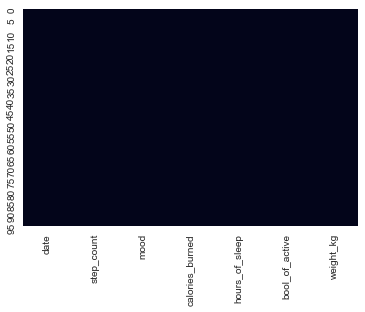

In [50]:
sns.heatmap(data.isnull(),cbar=False)

Label Encoding the target column

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['bool_of_active']=le.fit_transform(data['bool_of_active'])
data

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,1,66
...,...,...,...,...,...,...,...
91,2018-01-05,133,100,4,2,0,64
92,2018-01-06,153,300,0,8,0,64
93,2018-01-07,500,200,0,5,1,64
94,2018-01-08,2127,200,0,5,0,64


<AxesSubplot:>

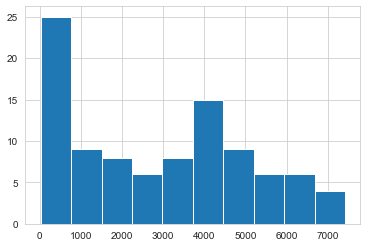

In [52]:
data['step_count'].hist()

<AxesSubplot:>

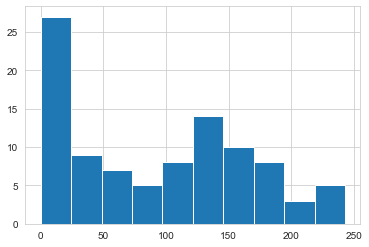

In [53]:
data['calories_burned'].hist()

<AxesSubplot:>

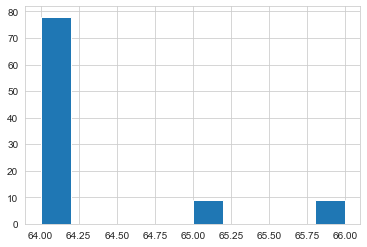

In [54]:
data['weight_kg'].hist()

<AxesSubplot:>

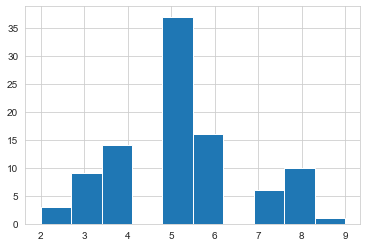

In [55]:
data['hours_of_sleep'].hist()

<AxesSubplot:>

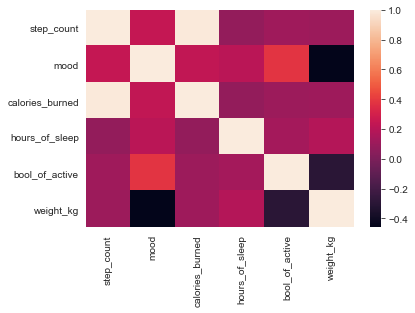

In [56]:
corr=data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

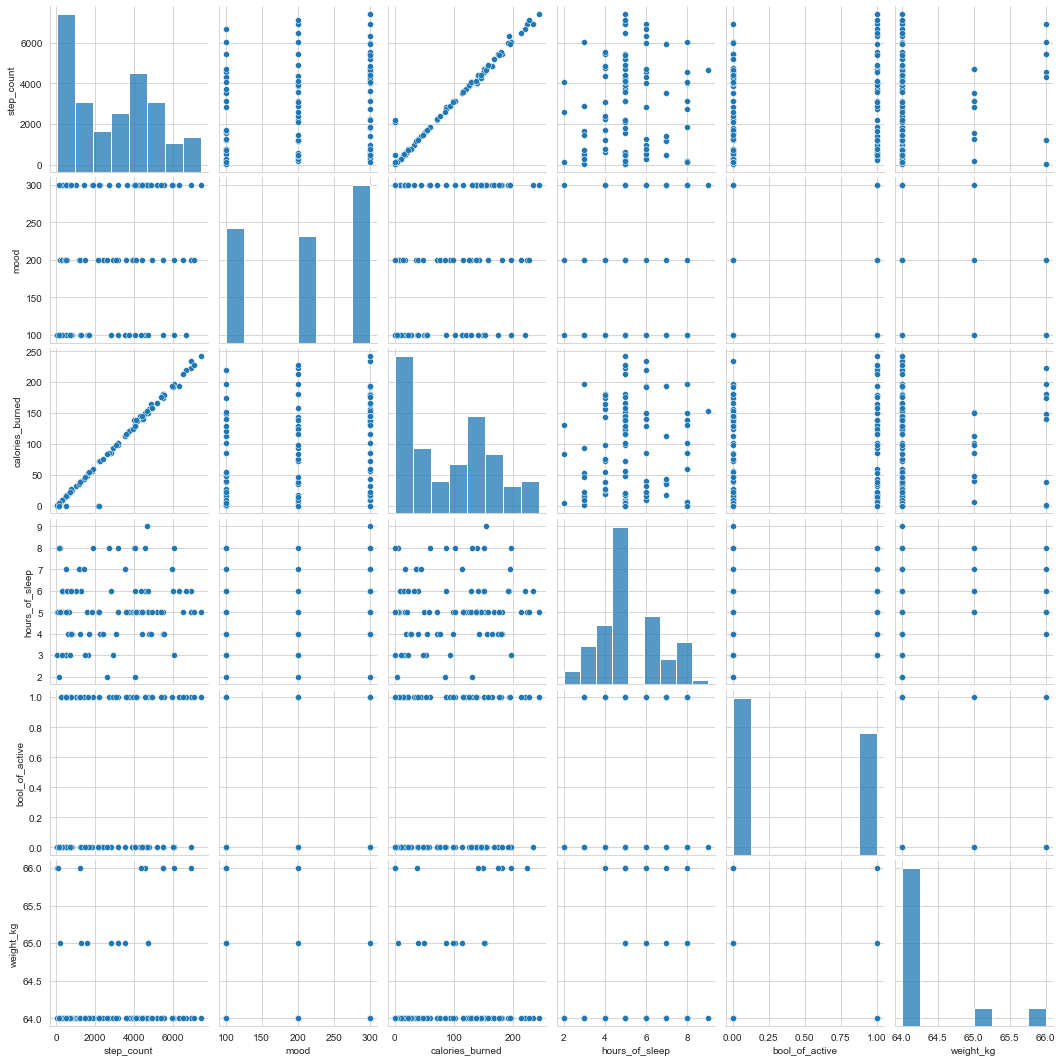

In [57]:
sns.set_style("whitegrid")
sns.pairplot(data)

In [58]:
data['step_count'].groupby(data.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,29.0,2103.068966,2057.012361,25.0,299.0,1258.0,3721.00,6676.0
200,27.0,3153.777778,2091.761446,202.0,1339.0,3066.0,4245.50,7102.0
300,40.0,3392.725000,2115.006540,153.0,1314.5,4048.5,4804.25,7422.0


<Figure size 432x360 with 0 Axes>

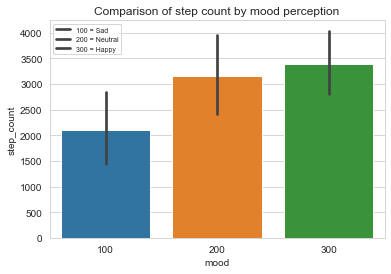

<Figure size 432x360 with 0 Axes>

In [59]:
sns.barplot(x="mood",y="step_count",data=data)
plt.title("Comparison of step count by mood perception")
plt.legend(['100 = Sad', '200 = Neutral', '300 = Happy'],loc='upper left',prop={'size':7})
plt.figure(figsize=(6,5))

In [60]:
data['step_count'].groupby(data.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,54.0,2709.888889,2059.107323,25.0,663.75,2486.5,4411.5,6930.0
1,42.0,3226.571429,2238.337734,221.0,1037.00,3362.0,4843.0,7422.0


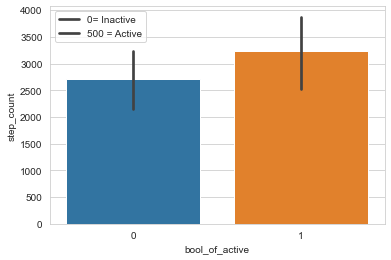

In [61]:
sns.barplot(x='bool_of_active', y='step_count', data=data)
plt.legend(['0= Inactive', '500 = Active'])

<AxesSubplot:>

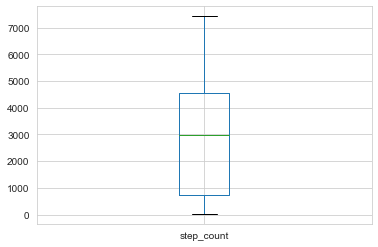

In [62]:
data.boxplot(column="step_count")

<AxesSubplot:>

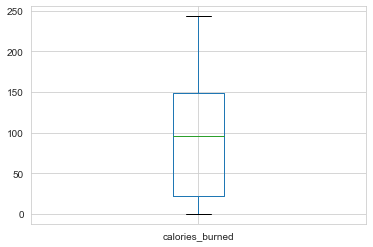

In [63]:
data.boxplot(column="calories_burned")

In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['bool_of_active']=le.fit_transform(data['bool_of_active'])
data

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,1,66
...,...,...,...,...,...,...,...
91,2018-01-05,133,100,4,2,0,64
92,2018-01-06,153,300,0,8,0,64
93,2018-01-07,500,200,0,5,1,64
94,2018-01-08,2127,200,0,5,0,64


In [23]:
x=pd.DataFrame(data.iloc[:,[1,2,3,4,6]])
y=pd.DataFrame(data.iloc[:,5])

In [24]:
x

,step_count,mood,calories_burned,hours_of_sleep,weight_kg
0,5464,200,181,5,66
1,6041,100,197,8,66
2,25,100,0,5,66
3,5461,100,174,4,66
4,6915,200,223,5,66
...,...,...,...,...,...
91,133,100,4,2,64
92,153,300,0,8,64
93,500,200,0,5,64
94,2127,200,0,5,64


In [25]:
x.values

array([[5464,  200,  181,    5,   66],
       [6041,  100,  197,    8,   66],
       [  25,  100,    0,    5,   66],
       [5461,  100,  174,    4,   66],
       [6915,  200,  223,    5,   66],
       [4545,  100,  149,    6,   66],
       [4340,  100,  140,    6,   66],
       [1230,  100,   38,    7,   66],
       [  61,  100,    1,    5,   66],
       [1258,  100,   40,    6,   65],
       [3148,  100,  101,    8,   65],
       [4687,  100,  152,    5,   65],
       [4732,  300,  150,    6,   65],
       [3519,  100,  113,    7,   65],
       [1580,  100,   49,    5,   65],
       [2822,  100,   86,    6,   65],
       [ 181,  100,    6,    8,   65],
       [3158,  200,   99,    5,   65],
       [4383,  200,  143,    4,   64],
       [3881,  200,  125,    5,   64],
       [4037,  200,  129,    6,   64],
       [ 202,  200,    6,    8,   64],
       [ 292,  200,    9,    5,   64],
       [ 330,  300,   10,    6,   64],
       [2209,  200,   72,    5,   64],
       [4550,  300,  150,

In [26]:
y

,bool_of_active
0,0
1,0
2,0
3,0
4,500
...,...
91,0
92,0
93,500
94,0


In [27]:
columnTransformer = ColumnTransformer([('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=pd.DataFrame(columnTransformer.fit_transform(x),dtype=np.str,columns=['sad','neutral','happy','step_count','calories_burned','hours_of_sleep','weight_kg'])

In [28]:
x

,sad,neutral,happy,step_count,calories_burned,hours_of_sleep,weight_kg
0,0.0,1.0,0.0,5464.0,181.0,5.0,66.0
1,1.0,0.0,0.0,6041.0,197.0,8.0,66.0
2,1.0,0.0,0.0,25.0,0.0,5.0,66.0
3,1.0,0.0,0.0,5461.0,174.0,4.0,66.0
4,0.0,1.0,0.0,6915.0,223.0,5.0,66.0
...,...,...,...,...,...,...,...
91,1.0,0.0,0.0,133.0,4.0,2.0,64.0
92,0.0,0.0,1.0,153.0,0.0,8.0,64.0
93,0.0,1.0,0.0,500.0,0.0,5.0,64.0
94,0.0,1.0,0.0,2127.0,0.0,5.0,64.0


In [29]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [30]:
dtc=DecisionTreeClassifier(max_depth=12)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12)

In [31]:
dt_y_train=dtc.predict([['0.0','0.0','1.0','4435.0','141.0','5.0','64.0']])
dt_y_train

array([0], dtype=int64)

In [36]:
dt_y_train

array([0], dtype=int64)

In [40]:
dtc.score(dt_y_train,x_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
dtc.score(x_train,y_train)

0.9883720930232558

In [71]:
import pickle
pickle.dump(dtc,open('fitness.pkl','wb'))